
# NLP (Natural Language Processing) with Python

## Kaggle BBC News Group 20 data set 

Data set can be down load from <a href="https://www.kaggle.com/balatmak/newsgroup20bbcnews">download</a>
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords.

Below is the sample code to download library from NLTK

! pip install nltk
import nltk
nltk.download()

## Get the Data

Download the data from above link and place into Dataset folder

Source data from public data set on BBC news articles. Source data from public data set on BBC news articles: D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006. [PDF] [BibTeX].

http://mlg.ucd.ie/datasets/bbc.html


In [1]:
import pandas as pd

In [8]:
data = pd.read_csv('dataset/bbc-text.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Exploratory Data Analysis

In [9]:
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,us duo in first spam conviction a brother and ...
freq,511,2


In [10]:
data.groupby('category').describe()

text                                                            \
              count unique                                                top   
category                                                                        
business        510    503  jobs growth still slow in the us the us create...   
entertainment   386    369  howl helps boost japan s cinemas japan s box o...   
politics        417    403  debate needed  on donations cap a cap on donat...   
sport           511    504  bortolami predicts dour contest italy skipper ...   
tech            401    347  what high-definition will do to dvds first it ...   

                    
              freq  
category            
business         2  
entertainment    2  
politics         2  
sport            2  
tech             2

# Data Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize
figsize(20,5)

%matplotlib inline

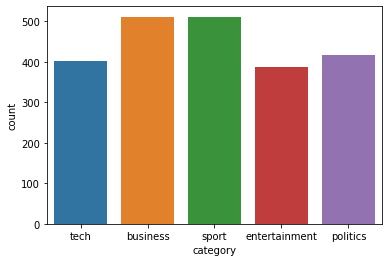

In [15]:
sns.countplot(data['category'])

# Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use apply() in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [20]:
import nltk
from nltk.corpus import stopwords
import string

In [21]:
def process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

In [22]:
# Check to make sure its working
data['text'].head(5).apply(process)

0    [tv, future, hands, viewers, home, theatre, sy...
1    [worldcom, boss, left, books, alone, former, w...
2    [tigers, wary, farrell, gamble, leicester, say...
3    [yeading, face, newcastle, fa, cup, premiershi...
4    [ocean, twelve, raids, box, office, ocean, twe...
Name: text, dtype: object

In [23]:
# Show original dataframe
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


##  Normalization and Vectorization

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=process).fit(data['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

32955


## TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

## Training a model

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(data['text'], data['category'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

1780 445 2225


## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [32]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [33]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x1082D078>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [34]:
predictions = pipeline.predict(msg_test)

In [35]:
print(classification_report(predictions,label_test))

               precision    recall  f1-score   support

     business       0.96      0.95      0.95        93
entertainment       0.91      1.00      0.96        75
     politics       0.95      0.91      0.93        87
        sport       1.00      0.99      1.00       104
         tech       0.98      0.97      0.97        86

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



In [38]:
# dump the model and test with some real time BBC news

from joblib import dump, load

In [41]:
dump(pipeline, 'bbc')

['bbc']

In [45]:
bbc = load('bbc')

text = "Market leaders QuessNSE 5.00 % Corp and TeamLease told ET that they were betting on growing \
customer requirements like managing staff virtually, conducting interviews online,\
remote training and remote surveillance. The two companies are among the largest private sector employers in the country. \
The coronavirus pandemic disrupted the staffing sector as temporary staff were the first to be laid-off by companies to \
control cost."


pred_value = bbc.predict([text])
pred_value

array(['business'], dtype='<U13')